In [1]:
import os
import glob
import cv2
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Import image paths
train_dir = '../data/training'
image_paths = glob.glob(os.path.join(train_dir, '01-minor', '*'))

In [3]:
# Function to load images and assign random costs
def load_images_with_costs(image_paths, image_size=(100, 100)):
    data_entries = []
    for image_path in image_paths:
        # Load and preprocess the image
        image = cv2.imread(image_path)
        if image is None:
            continue  # Skip invalid images
        image = cv2.resize(image, image_size)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = image / 255.0  # Normalize pixel values
        
        # Assign a random cost within the specified range
        random_cost = float(f"{random.uniform(50, 200):.2f}")
        
        # Store the image and its cost
        data_entries.append((image, random_cost))
    
    return data_entries

# Load images and assign random costs
data_entries = load_images_with_costs(image_paths)


In [4]:
# Example: Print the first entry's shape and assigned cost
if data_entries:
    print("First image shape:", data_entries[0][0].shape)
    print("First assigned cost:", data_entries[0][1])
else:
    print("No images were loaded.")

First image shape: (100, 100, 3)
First assigned cost: 165.59


In [5]:
# Prepare inputs (X) and labels (y)
X = np.array([entry[0] for entry in data_entries])  # Images
y = np.array([entry[1] for entry in data_entries])  # Costs

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# minor moderate and severe (3)
model.add(Dense(1))

In [8]:
# Compile Model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [9]:
# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - loss: 13495.9453 - mean_absolute_error: 104.8672 - val_loss: 2222.5554 - val_mean_absolute_error: 39.4168
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - loss: 3120.1223 - mean_absolute_error: 46.2934 - val_loss: 2655.8374 - val_mean_absolute_error: 43.7416
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - loss: 2855.9111 - mean_absolute_error: 43.3928 - val_loss: 2661.8740 - val_mean_absolute_error: 42.1119
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 2706.5830 - mean_absolute_error: 43.4568 - val_loss: 2350.6082 - val_mean_absolute_error: 41.0840
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - loss: 2112.0923 - mean_absolute_error: 38.6664 - val_loss: 2412.2312 - val_mean_absolute_error: 41.0584
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 2276.6868 - mean_absolute_error: 39.9638 - val_loss: 2361.1272 - val_mean_absolute_error: 40.0958
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/ste

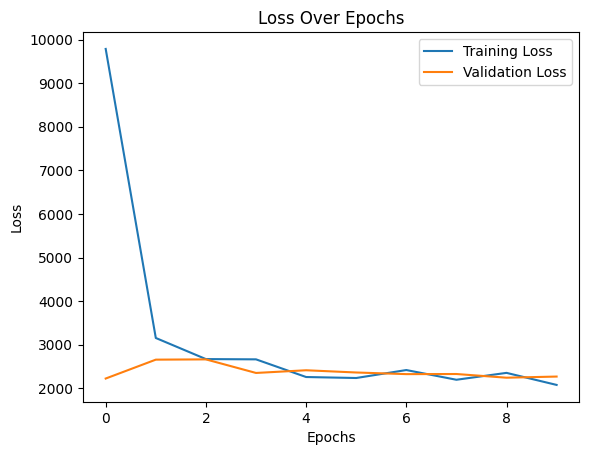

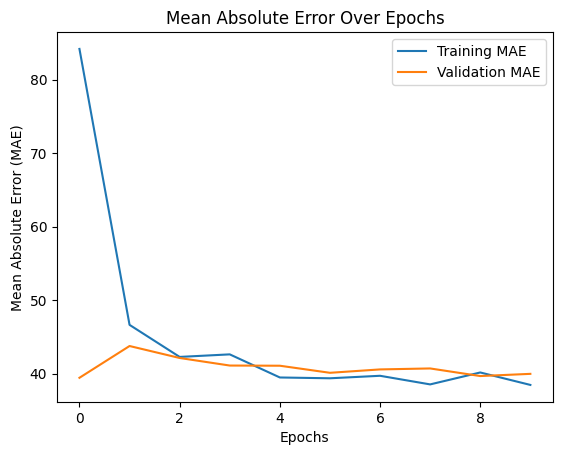

In [10]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error Over Epochs')
plt.legend()
plt.show()